In [5]:
import logging
from typing import List, Callable, Optional, Any

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.decomposition import PCA

from randnn import ContinuousNN, get_attractor_dimension, scaling_analysis, downsample, downsample_split, avg_over
from randnn.utils import np_cache, eigsort
from randnn.plotting import *
from randnn.systems import DoubleWell
from randnn.transfer_operator import *

rc('text', usetex=True)
logging.basicConfig(level=logging.INFO)

# Generating random continuous-rate neural networks

First, we want to make sure that we're correctly creating our random neural networks. 

### Parameters
Change the following parameters to play with generated neural networks.

In [62]:
# Main parameters:
COUPLING_STRENGTH = 1.2
N_NEURONS = 100

# The remaining parameters influence temporal resolution and trajectory duration
TIMESTEP = 0.1
N_STEPS = 100000
N_BURNIN_STEPS = 500

In [63]:
# Create a network
cont_nn = ContinuousNN(coupling_strength=COUPLING_STRENGTH, n_dofs=N_NEURONS, max_step=TIMESTEP)

# Generate a neural trajectory on this network
trajectory = cont_nn.run(n_steps=N_STEPS, n_burn_in=N_BURNIN_STEPS)

# Calculate the lyapunov spectrum of this network
lyapunov_spectrum = cont_nn.get_lyapunov_spectrum(trajectory, t_ons=100)

# Given the lyapunov spectrum, calculate the attractor dimension
print("Attractor dimension: {}".format(get_attractor_dimension(lyapunov_spectrum)))

INFO:root:Loading from save ./saves/trajectories/trajectory-30399ff26a29556d39761a751341f620.npy
INFO:root:Loading from save ./saves/lyapunov/spectrum-1599f5b2d6c3faa73b2ae3178990b2cf.npy


Attractor dimension: 2.1932776499282243


/Users/Jesse/Projects/masters-thesis/code/randnn/randnn/plotting.py:62: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = patches.Circle((0, 0),


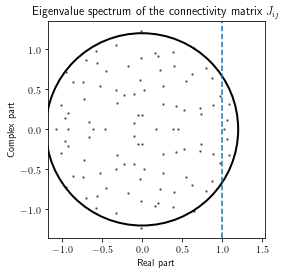

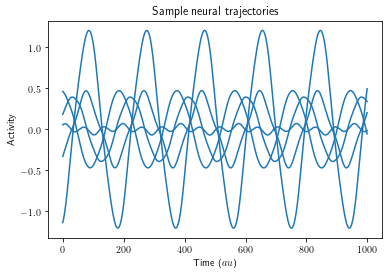

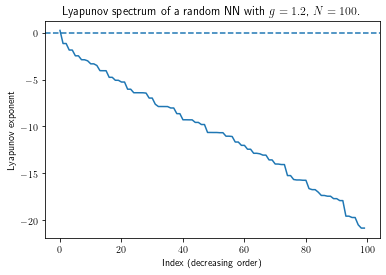

In [65]:
# Plot the eigenvalue spectrum and make sure it respects Girko's circular law
plot_random_matrix_spectrum(cont_nn.coupling_matrix, COUPLING_STRENGTH)
plt.show()

# Plot a few sample trajectories to get visual insight to the (non-)chaotic dynamics
plot_trajectory_samples(trajectory[:1000], 5)
plt.show()

# Plot the full lyapunov spectrum (following Engelken et al. 2020)
plot_lyapunov_spectrum(lyapunov_spectrum, title="Lyapunov spectrum of a random NN with $g={}$, $N={}$.".format(COUPLING_STRENGTH, N_NEURONS))
plt.show()